In [40]:
import matplotlib.pyplot as plt
import numpy as np

import bussilab
from bussilab import ann
import scipy
from scipy.optimize import minimize
%matplotlib notebook

In [41]:
#initalizing matrices: In our representations, vector L is [DeQ1, DeQ1**2, DeQ2, DeQ2**2,....,DeQ5**2, DeQ1*DeQ2, DeQ1*DeQ3,.... , DeQ4*DeQ5]

DeQ=[0.3, 0.0, 0.1, 0.2, -0.2]
DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]

Loading WHAM output for each AFEC computation:   
\
W0: weights;  
logZ: log of partition functions;  
dE: energy differences between lambda 0 and lambda 1;  
Tr: Transformation Matrix for recomputing energies for any DeQ;  
eta6: angles values for torsional eta6;
eta6b: angles values for torsional eta6 for m6A in the second chain, in system cases where double methylation occurs

In [42]:
W0=[]
app=np.load("AFEC/m6a_anti/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/m6a_syn/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/Hurst_helix/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/Single_strand_Hurst/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/entry9_roost_anti/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/ss_entry9/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/ACGC/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/ss_ACGC/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/GCGA_duplex/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("AFEC/ss_GCGA/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_GUC6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_GUC6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ACU6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACU6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_AGUU6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_AGUU6/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_CGGUG/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_CGGC/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ACUUA6GU/ReplicaEx/logW.npy")
W0.append(np.exp(app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACUUA6GU/ReplicaEx/logW.npy")
W0.append(np.exp(app))

In [43]:
logZ=[]
app=np.load("AFEC/m6a_anti/ReplicaEx/logZ.npy")
logZ.append(app)
app=np.load("AFEC/m6a_syn/ReplicaEx/logZ.npy")
logZ.append(app)
app=np.load("AFEC/Hurst_helix/ReplicaEx/logZ.npy")
logZ.append(app)
app=np.load("AFEC/Single_strand_Hurst/ReplicaEx/logZ.npy")
logZ.append(app)
app=np.load("AFEC/entry9_roost_anti/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/ss_entry9/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/ACGC/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/ss_ACGC/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/GCGA_duplex/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("AFEC/ss_GCGA/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_GUC6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_GUC6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACU6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACU6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_AGUU6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_AGUU6/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_CGGUG/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_CGGC/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACUUA6GU/ReplicaEx/logZ.npy")
logZ.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACUUA6GU/ReplicaEx/logZ.npy")
logZ.append((app))

In [44]:
dE=[]
app=np.load("AFEC/m6a_anti/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("AFEC/m6a_syn/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("AFEC/Hurst_helix/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("AFEC/Single_strand_Hurst/ReplicaEx/DeE.npy")
dE.append(app)
app=np.load("AFEC/entry9_roost_anti/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/ss_entry9/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/ACGC/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/ss_ACGC/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/GCGA_duplex/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("AFEC/ss_GCGA/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_GUC6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_GUC6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACU6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACU6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_AGUU6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_AGUU6/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_CGGUG/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_CGGC/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACUUA6GU/ReplicaEx/DeE.npy")
dE.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACUUA6GU/ReplicaEx/DeE.npy")
dE.append((app))

In [45]:
Tr=[]
app=np.load("AFEC/m6a_anti/Trans_vectors.npy")
Tr.append(app)
app=np.load("AFEC/m6a_syn/Trans_vectors.npy")
Tr.append(app)
app=np.load("AFEC/Hurst_helix/Trans_vectors.npy")
Tr.append(app)
app=np.load("AFEC/Single_strand_Hurst/Trans_vectors.npy")
Tr.append(app)
app=np.load("AFEC/entry9_roost_anti/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/ss_entry9/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/ACGC/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/ss_ACGC/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/GCGA_duplex/Trans_vectors.npy")
Tr.append((app))
app=np.load("AFEC/ss_GCGA/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_GUC6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_GUC6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACU6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACU6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_AGUU6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_AGUU6/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_CGGUG/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_CGGC/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ACUUA6GU/Trans_vectors.npy")
Tr.append((app))
app=np.load("Kierzek_AFEC/Aduri_ss_ACUUA6GU/Trans_vectors.npy")
Tr.append((app))

In [46]:
eta6=[]
eta6b=[]
app=np.loadtxt("AFEC/m6a_anti/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/m6a_syn/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/Hurst_helix/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/Single_strand_Hurst/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/entry9_roost_anti/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/ss_entry9/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/ACGC/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/ss_ACGC/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/GCGA_duplex/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("AFEC/ss_GCGA/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_GUC6/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_GUC6/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_ACU6/COLVAR")
eta6.append(app[:,1])
eta6b.append(app[:,2])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_ACU6/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_AGUU6/COLVAR")
eta6.append(app[:,1])
eta6b.append(app[:,2])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_AGUU6/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_CGGUG/COLVAR")
eta6.append(app[:,1])
eta6b.append(app[:,2])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_CGGC/COLVAR")
eta6.append(app[:,1])
app=np.loadtxt("Kierzek_AFEC/Aduri_ACUUA6GU/COLVAR")
eta6.append(app[:,1])
eta6b.append(app[:,2])
app=np.loadtxt("Kierzek_AFEC/Aduri_ss_ACUUA6GU/COLVAR")
eta6.append(app[:,1])


dEtot=np.array(dE)
W0tot=np.array(W0)
Trtot=np.array(Tr)
eta6=np.array(eta6)
eta6b=np.array(eta6b)
W0=W0tot
dE=dEtot
Tr=Trtot

In [47]:
#Since some alchemical simulations were performed also by switching on the torsional term eta6, we correct the the energies differences for those contribution


import math
for i in range(10):
    dE[10+i]-=np.multiply([np.cos(eta6[10+i]-math.pi)+1],2.5).reshape(-1)
    
dE[12]-=np.multiply([np.cos(eta6b[0]-math.pi)+1],2.5).reshape(-1)
dE[14]-=np.multiply([np.cos(eta6b[1]-math.pi)+1],2.5).reshape(-1)
dE[16]-=np.multiply([np.cos(eta6b[2]-math.pi)+1],2.5).reshape(-1)
dE[18]-=np.multiply([np.cos(eta6b[3]-math.pi)+1],2.5).reshape(-1)

In [48]:
USE_CUDA=True

In [49]:
#defining my function func_and_grad which takes into account also 2 methylations case
#This function take as input a list of parameters, and give as output the Cost function and his gradient with respect to the parameters

import cudamat as cm
    # this is necessary to allow for CUDA operation
cm.init(max_ones=W0.shape[1])
cm_Tr=cm.CUDAMatrix(np.array(Tr).reshape(-1,20))
cm_W0=cm.CUDAMatrix(np.reshape(np.array(W0).reshape(-1),(1,-1)))



def func_and_grad_2met(par):
    pen=par[5]
    DeQ=par[:5]
    DeQ=np.array(DeQ)
    #The sixth parameter correspond to the amplitude of the cosine of the dihedral. 
    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met

    #experimental DeDeGs and errors
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 0.8, 1.0])
    
    #energy contributions due to torsional term, with apmlituted of the cosine function given by the parameter pen 
    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))
    
    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    DeGDePen=[]
    Chi2=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
            cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
            for j in range(len(lam)):
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 

        for k in range (2*N2met):
            i=k+2*N1met
            if k%2==0:
                #cases in which two methylation occurs. Here I want to compute DeG for methylation, so DeG is divided by two
                
                esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])
             
                
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*(np.sum([np.cos(eta6[i]-math.pi)+1]+[np.cos(eta6b[int(k/2)]-math.pi)+1],axis=0))*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
               
                DeGDePen.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                for j in range(len(lam)):
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                    DeGDel.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
            if k%2==1:
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                for j in range(len(lam)):
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 

    else:
        print("use Cuda!")
        arrS=np.array(np.matmul(Tr,lam))
        for i in range (2*N1met):
            DeG.append(-2.476*(_logsum((np.log(W0[i])-(1/2.476)*(arrS[i]+dE[i]+tors[i])))-logZ[i][0]))
            
            DeGDePen.append(2.476*sum(W0[i]*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))))
            for j in range(len(lam)):
                DeGDel.append(2.476*sum(W0[i]*(1/2.476)*Tr[i][:,j]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]))))) 
        
        for k in range (2*N2met):
            i=N1met+k
            if k%2==0:
                DeG.append(-2.476/2*(_logsum((np.log(W0[i])-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])))-logZ[i][0]))
            
                DeGDePen.append(2.476/2*sum(W0[i]*(1/2.476)*([np.cos(eta6[:]-math.pi)+1]+[np.cos(eta6b[int(k/2)]-math.pi)+1])*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])))))
                for j in range(len(lam)):
                    DeGDel.append(2.476/2*sum(W0[i]*(1/2.476)*Tr[i][:,j]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[k/2])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[k/2]))))) 
            if k%2==1:    
                DeG.append(-2.476*(_logsum((np.log(W0[i])-(1/2.476)*(arrS[i]+dE[i]+tors[i])))-logZ[i][0]))
            
                DeGDePen.append(2.476*sum(W0[i]*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))))
                for j in range(len(lam)):
                    DeGDel.append(2.476*sum(W0[i]*(1/2.476)*Tr[i][:,j]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))/(sum(W0[i]*_softmax(-(1/2.476)*(arrS[i]+dE[i]+tors[i])))))  

    DeGDel=np.array(DeGDel).reshape((2*Ntot,20))
    
    for i in range(Ntot):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(-2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))

    #The gradient of the Cost function with respect to variation in the charges is computed here as a poduct of matrices
    grad=np.matmul(np.array(DeChiDeG),np.matmul(DeGDel,np.transpose(DeLDeQ)))
    
    

    Cost=np.sum(Chi2)
    Cost+=(alpha*((np.sum(DeQ**2))+(np.sum(DeQ)+2*DeQ[4])**2))
    Cost+=Beta*pen*pen           
    
    for i in range(4):
        grad[i]+=2*alpha*(np.sum(DeQ)+2*DeQ[4]+DeQ[i])
    grad[4]+=alpha*(14*DeQ[4]+6*np.sum(DeQ))   
    
    grad=np.append(grad,0)
    
    #the 6th component of the gradient (derivatives with respect to torsional amplitude) is added
    grad[5]+=np.matmul(np.array(DeChiDeG),np.array(DeGDePen))
    grad[5] += 2*Beta*pen
    
    print("Chi2:",Chi2)
    
    return float(Cost),np.array(grad)

In [50]:
#Function to simply compute the Chi square

def chis(par):
    pen=par[5]
    DeQ=par[:5]
  
    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]

    N1met=6
    N2met=4
    Ntot=N1met+N2met

    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 0.8, 1.0])
    

    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))
    

    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    Chi2=[]
    
    if USE_CUDA:
        
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
  

        for k in range (2*N2met):
            i=k+2*N1met
            if k%2==0:
                #cases in which two methylation occurs. Here I want to compute DeG for methylation, so DeG is divided by two
                
                esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])
             
                
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
        
            if k%2==1:
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
        
    else:
        print("Use Cuda")

    for i in range(Ntot):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(sig[i]**2))

    
    
    return (np.array(Chi2))

In [51]:
# Func_grad function for Cross Validation on experiments, it's the same but exclude one experiment based on index excl
def func_and_grad_CV(par):
    pen=par[5]
    DeQ=par[:5]
    
    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met-1
    
    

    
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 1.3, 0.8, 1.0])

    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))

    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    DeGDePen=[]
    Chi2=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            if (i != 2*excl and i != 2*excl+1):
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                for j in range(len(lam)):
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
        for k in range (2*N2met):
            i=k+2*N1met
            if (i != 2*excl and i != 2*excl+1):
                if k%2==0:
                
                    esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])
                
                    cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                    cm_we.sum(axis=1).asarray()[0,0]
                    DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*(np.sum([np.cos(eta6[i]-math.pi)+1]+[np.cos(eta6b[int(k/2)]-math.pi)+1],axis=0))*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
               
                    DeGDePen.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                    for j in range(len(lam)):
                        cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                        DeGDel.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
                if k%2==1:
                    esp_min=np.min(arrS[i]+dE[i]+tors[i])
                    cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    cm_we.sum(axis=1).asarray()[0,0]
                    DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                    for j in range(len(lam)):
                        cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                        DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
        
    else:
        print("you better use Cuda") 
        
    DeGDel=np.array(DeGDel).reshape((2*(Ntot-1),20))
    
    Exp=np.delete(Exp, excl)
    sig=np.delete(sig, excl)
    
    for i in range(Ntot-1):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
        DeChiDeG.append(-2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/(Ntot*sig[i]*sig[i]))
   

    grad=np.matmul(np.array(DeChiDeG),np.matmul(DeGDel,np.transpose(DeLDeQ)))
    
    Cost=np.sum(Chi2)

    Cost+=(alpha*((np.sum(DeQ**2))+(np.sum(DeQ)+2*DeQ[4])**2))
    Cost+=Beta*pen*pen           

    
    for i in range(4):
        grad[i]+=2*alpha*(np.sum(DeQ)+2*DeQ[4]+DeQ[i])
    grad[4]+=alpha*(14*DeQ[4]+6*np.sum(DeQ))   
    
    grad=np.append(grad,0)
    
                    
    grad[5]+=np.matmul(np.array(DeChiDeG),np.array(DeGDePen))
    grad[5] += 2*Beta*pen
    
    
    print("Chi2:",Chi2)    
    
    return float(Cost),np.array(grad)

In [52]:
#return Chi2 from the experiment left out, 
def CV_control(par, excl):
    pen=par[5]
    DeQ=par[:5]
   

    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
 
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 0.8, 1.0])
    
    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))

    
    DeG=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)
        i=2*excl
        if excl<N1met:
            
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
        else:
            esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int((N1met-excl))])
                
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(N1met-excl)]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))           
        i=(2*excl+1)
        esp_min=np.min(arrS[i]+dE[i]+tors[i])
        cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
        cm_we.sum(axis=1).asarray()[0,0]
        DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
    else:
        print("use cuda")
                

        
    return((DeG[0]-DeG[1]-Exp[excl])*(DeG[0]-DeG[1]-Exp[excl])/(sig[excl]*sig[excl]))

#for a set of hyperparameters, loops on the experiments to be left out in the minimization
#and return mean and std of Chi2 computed on the left out experiment
def CV_exp():
    out=[]
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    global excl
    
    for excl in range(1,Ntot):
        lambdas=scipy.optimize.minimize(func_and_grad_CV, x0=[0,0,0,0,0,1] , method='L-BFGS-B',jac=True, options={'eps': 1e-05})   
        out.append(CV_control(lambdas.x,excl))
    return((np.sum(out)/(Ntot)), out)

    

In [53]:
def _logsum(ns):
    max = np.max(ns)
    ds = ns - max
    sumOfExp = np.exp(ds).sum()
    return max + np.log(sumOfExp)

def _softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x

#Functions to compute Kish sizes based on parameters
def Kish_size(DeQ):
    
    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    Kish=[]
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*Ntot):
            esp_min=np.min(arrS[i]+dE[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            cm_we2=cm.CUDAMatrix(np.reshape((np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]-esp_min)))**2,(1,-1)))
            Kish.append((cm_we.sum(axis=1).asarray()[0,0])**2/cm_we2.sum(axis=1).asarray()[0,0])
        
        
    else:
        arrS=np.array(np.matmul(Tr,lam))
        for i in range (10):
            Kish.append((np.sum(W0[i]*np.exp(-(1/2.476)*(arrS[i]+dE[i]))))**2/(np.sum((W0[i]*np.exp(-(1/2.476)*(arrS[i]+dE[i])))**2)))
        
    return (np.sum(Kish))   

In [54]:
#Function to compute Cost and gradient when cross validating excluding 3 experiments in the minimization, 
def func_and_grad_CV3(par):
    pen=par[5]
    DeQ=par[:5]
    DeQ=np.array(DeQ)
    

    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
    DeLDeQ=[[1, 2*DeQ[0], 0 ,0, 0, 0, 0, 0, 0, 0, DeQ[1], DeQ[2], DeQ[3], DeQ[4], 0, 0, 0, 0, 0, 0],
       [ 0, 0, 1, 2*DeQ[1], 0, 0, 0, 0, 0, 0, DeQ[0], 0, 0, 0, DeQ[2], DeQ[3], DeQ[4], 0, 0, 0],
       [ 0, 0, 0, 0, 1, 2*DeQ[2], 0, 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, 0, DeQ[3], DeQ[4], 0],
       [ 0, 0, 0, 0, 0, 0, 1, 2*DeQ[3], 0, 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], 0, DeQ[4]],
       [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 2*DeQ[4], 0, 0, 0, DeQ[0], 0, 0, DeQ[1], 0, DeQ[2], DeQ[3]]]
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met
   


    
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 1.3, 0.8, 1.0])

    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))

    DeG=[]
    DeGDel=[]
    DeChiDeG=[]
    DeGDePen=[]
    Chi2=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)

        for i in range (2*N1met):
            if (i != 2*excl[0] and i != 2*excl[0]+1 and i != 2*excl[1] and i != 2*excl[1]+1 and i != 2*excl[2] and i != 2*excl[2]+1):
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                for j in range(len(lam)):
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
        for k in range (2*N2met):
            i=k+2*N1met
            if (i != 2*excl[0] and i != 2*excl[0]+1 and i != 2*excl[1] and i != 2*excl[1]+1 and i != 2*excl[2] and i != 2*excl[2]+1):
                if k%2==0:
                
                    esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)])
                
                    cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                    cm_we.sum(axis=1).asarray()[0,0]
                    DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*(np.sum([np.cos(eta6[i]-math.pi)+1]+[np.cos(eta6b[int(k/2)]-math.pi)+1],axis=0))*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
               
                    DeGDePen.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                    for j in range(len(lam)):
                        cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(k/2)]-esp_min)),(1,-1)))
                        DeGDel.append(2.476/2*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
                if k%2==1:
                    esp_min=np.min(arrS[i]+dE[i]+tors[i])
                    cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    cm_we.sum(axis=1).asarray()[0,0]
                    DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
                    cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*[np.cos(eta6[i]-math.pi)+1]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                    DeGDePen.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0])
                    for j in range(len(lam)):
                        cm_we2=cm.CUDAMatrix(np.reshape(np.array(W0[i])*(1/2.476)*Tr[i][:,j]*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                        DeGDel.append(2.476*cm_we2.sum(axis=1).asarray()[0,0]/cm_we.sum(axis=1).asarray()[0,0]) 
        
    else:
        print("you better use Cuda") 
        
    DeGDel=np.array(DeGDel).reshape((2*(Ntot-3),20))
    
    Exp=np.delete(Exp, excl)
    sig=np.delete(sig, excl)
    
    for i in range(Ntot-3):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[i])*(DeG[i*2]-DeG[i*2+1]-Exp[i])/((Ntot-3)*sig[i]*sig[i]))
        DeChiDeG.append(2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/((Ntot-3)*sig[i]*sig[i]))
        DeChiDeG.append(-2*(DeG[i*2]-DeG[i*2+1]-Exp[i])/((Ntot-3)*sig[i]*sig[i]))
    

    grad=np.matmul(np.array(DeChiDeG),np.matmul(DeGDel,np.transpose(DeLDeQ)))
    

    Cost=np.sum(Chi2)
    Cost+=(alpha*((np.sum(DeQ**2))+(np.sum(DeQ)+2*DeQ[4])**2))
    Cost+=Beta*pen*pen           

    
    for i in range(4):
        grad[i]+=2*alpha*(np.sum(DeQ)+2*DeQ[4]+DeQ[i])
    grad[4]+=alpha*(14*DeQ[4]+6*np.sum(DeQ)) 
    grad=np.append(grad,0)
    
                    
    grad[5]+=np.matmul(np.array(DeChiDeG),np.array(DeGDePen))
    grad[5] += 2*Beta*pen
    
    
    print("Chi2:",Chi2)    
    
    return float(Cost),np.array(grad)

In [55]:
def CV_control3(par, excl):
    pen=par[5]
    DeQ=par[:5]
    Chi2=[]

    lam=[DeQ[0],DeQ[0]*DeQ[0],DeQ[1],DeQ[1]*DeQ[1],DeQ[2],DeQ[2]*DeQ[2],DeQ[3],DeQ[3]*DeQ[3],DeQ[4],DeQ[4]*DeQ[4],DeQ[0]*DeQ[1],DeQ[0]*DeQ[2],DeQ[0]*DeQ[3],DeQ[0]*DeQ[4],DeQ[1]*DeQ[2],DeQ[1]*DeQ[3],DeQ[1]*DeQ[4],DeQ[2]*DeQ[3],DeQ[2]*DeQ[4],DeQ[3]*DeQ[4]]
 
    
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    
    Exp=[6.3, 1.7, 7.1, -2.5, -1.7, 2.5, 2.1, 5.4, 8.6, 1.7]
    sig=np.array([0.5, 0.9, 0.9, 1.2, 0.9, 2.1, 1.3, 1.3, 0.8, 1.0])
    
    tors=(np.array(np.multiply([np.cos(eta6[:]-math.pi)+1],pen)).reshape(2*Ntot,-1))
    tors2=(np.array(np.multiply([np.cos(eta6b[:]-math.pi)+1],pen)).reshape(N2met,-1))

    
    DeG=[]
    
    if USE_CUDA:
        
        cm.init(max_ones=W0.shape[1])
        cm_lam=cm.CUDAMatrix(np.reshape(np.array(lam),(-1,1)))
        arrS=cm.dot(cm_Tr,cm_lam).asarray()
        arrS=arrS.reshape(2*Ntot,-1)
        for k in range(3):
            i=2*excl[k]
            if i<2*N1met:
            
                esp_min=np.min(arrS[i]+dE[i]+tors[i])
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            else:
                esp_min=np.min(arrS[i]+dE[i]+tors[i]+tors2[int(N1met-excl[k])])
                
                cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]+tors2[int(N1met-excl[k])]-esp_min)),(1,-1)))
                cm_we.sum(axis=1).asarray()[0,0]
                DeG.append(-(2.476/2)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))           
            i+=1
            esp_min=np.min(arrS[i]+dE[i]+tors[i])
            cm_we=cm.CUDAMatrix(np.reshape(np.array(W0[i])*np.exp(-(1/2.476)*(arrS[i]+dE[i]+tors[i]-esp_min)),(1,-1)))
            cm_we.sum(axis=1).asarray()[0,0]
            DeG.append(-(2.476)*(np.log(cm_we.sum(axis=1).asarray()[0,0])-(1/2.476)*esp_min-logZ[i][0]))
            
    else:
        print("use cuda")
                
    for i in range(3):
        Chi2.append((DeG[i*2]-DeG[i*2+1]-Exp[excl[i]])*(DeG[i*2]-DeG[i*2+1]-Exp[excl[i]])/(3*sig[excl[i]]*sig[excl[i]]))


        
    return(np.sum(Chi2))

#for a set of hyperparameters, loops on the experiments to be left out in the minimization
#and return mean and std of Chi2 computed on the left out experiments
def CV_exp3():
    out=[]
    N1met=6
    N2met=4
    Ntot=N1met+N2met
    
    for k in range(len(excl3V)):
        global excl
   
        excl=np.array(excl3V[k])
        
        lambdas=scipy.optimize.minimize(func_and_grad_CV3, x0=[0,0,0,0,0,1] , method='L-BFGS-B',jac=True, options={'eps': 1e-05})   
        out.append(CV_control3(lambdas.x,excl))
    return(np.average(out), out)

In [143]:
#Randomly selecting 20 sets of 3 experiments to be eft out

excl3V=[]
for k in range(20):
    excl3V.append(np.random.choice(range(10),3, replace=False))
excl3V=np.array(excl3V)
excl3V

array([[4, 1, 8],
       [3, 8, 1],
       [8, 0, 6],
       [0, 3, 2],
       [3, 4, 1],
       [1, 9, 3],
       [3, 9, 1],
       [1, 9, 5],
       [1, 3, 2],
       [1, 0, 5],
       [2, 1, 9],
       [5, 9, 3],
       [6, 9, 8],
       [6, 7, 5],
       [2, 1, 4],
       [0, 4, 7],
       [2, 0, 9],
       [2, 9, 4],
       [0, 4, 1],
       [2, 6, 7]])

In [ ]:

CV3=[]

for alpha in (0.1, 1, 5, 10, 20, 50, 100, 200, 1000, 10000, 100000):
    for Beta in (0, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000):
 
        CV3.append((alpha, Beta, CV_exp3()))

Chi2: [3.962657732291072, 0.5010977083790021, 0.0019281132627454777, 0.04132120610849381, 0.5206820813496519, 0.2871728462432938, 4.6234996681245715]
Chi2: [11676.266082036223, 2771.2284067857418, 51.17517645686501, 77.80536356507886, 175.35016280861157, 7407.9101642533815, 1488.0209348553374]
Chi2: [33.704192042352034, 51.14339866656136, 16.312423589119568, 8.096822636834457, 58.76236277577658, 39.13105357798426, 42.076542819973135]
Chi2: [2.778262963913167, 0.40649203698515957, 0.011390608342351186, 0.003265420101001979, 0.0005902941714683622, 0.3875623352805916, 5.325813168836109]
Chi2: [2.654448976964751, 0.5109400199063227, 0.011672188132201066, 0.0002125183062986304, 0.05742744693314536, 0.5215938583147003, 4.729598548784393]
Chi2: [2.327211021801038, 1.0420198794168463, 0.0071058451558614535, 0.0032210236123763284, 0.2829798307532598, 0.9145539746207585, 2.6822719832401374]
Chi2: [1.1999548213698066, 1.3670877601767055, 0.005487847574974826, 0.0018158811298504027, 0.347891632634

Chi2: [0.008489950176081467, 0.10098304243556024, 0.00032206743426442785, 0.04718670257791626, 0.04646846294339182, 0.08399885352880451, 0.024716282631912504]
Chi2: [0.0012168187181137915, 0.13504243507616437, 0.000539877355852583, 0.044170991121847504, 0.009957984195952172, 0.09253866914596758, 0.034383256542438026]
Chi2: [0.005194516247359456, 0.11268378756342848, 6.245766022983232e-06, 0.045834292146709116, 0.028791886690054544, 0.08747055023916886, 0.02860301705299793]
Chi2: [0.0035593326913133092, 0.10287547746561872, 0.0006919960821596795, 0.04796201982350609, 0.03214909472252121, 0.09405898401980378, 0.023223437140931034]
Chi2: [0.003257620400691604, 0.08994635122719218, 0.0013838934528754099, 0.04575481956052142, 0.03455557769942465, 0.10393423135549867, 0.024083627146944696]
Chi2: [0.0029830780701932133, 0.08747555222486379, 0.0011676459456866043, 0.04478543015563595, 0.03456442148837129, 0.10674296039752394, 0.02498967084473658]
Chi2: [0.0030093346385418967, 0.087188300271710

Chi2: [0.00465067768013959, 0.08797306156490689, 0.00048259016075193956, 0.04267803551491318, 0.03211758451433737, 0.11404096995237088, 0.0186722996944215]
Chi2: [0.004650677703885671, 0.08797306150516522, 0.00048259016071595137, 0.04267803549729984, 0.03211758448941658, 0.11404096999930217, 0.018672299725295365]
Chi2: [0.004650131085117386, 0.08797183408135134, 0.0004826201601375896, 0.042679426266621225, 0.032118547850080115, 0.11404143775344662, 0.01867185670842465]
Chi2: [0.004650677729967238, 0.08797306143954675, 0.00048259016067544005, 0.04267803547795551, 0.032117584462044886, 0.11404097005084624, 0.01867229975919863]
Chi2: [0.00465067775603855, 0.08797306137396368, 0.0004825901606355187, 0.04267803545861858, 0.03211758443468207, 0.11404097010237636, 0.018672299793096394]
Chi2: [0.0046504044165644595, 0.08797290008158351, 0.0004828163453747561, 0.042678339099698454, 0.03211946705959465, 0.11404409315029232, 0.018671022737482904]
Chi2: [0.004650677757119849, 0.08797306137124478, 

Chi2: [0.0017592012482265664, 0.11623127571424062, 0.0037614574763258275, 0.021237603691740787, 0.04035274919369032, 0.14937832876341567, 0.028281456885843135]
Chi2: [0.0017592012485167314, 0.1162312757129303, 0.0037614574763272916, 0.02123760369150149, 0.040352749193157476, 0.14937832876444407, 0.02828145688657253]
Chi2: [0.0017592012485248415, 0.1162312757128896, 0.0037614574763272916, 0.021237603691494033, 0.04035274919313921, 0.149378328764476, 0.028281456886595113]
Chi2: [0.0017577752331675127, 0.11623594916745662, 0.003761457490075796, 0.021237602174301644, 0.040352618356690906, 0.1493759674229441, 0.02828221198241565]
Chi2: [0.0017592012486473958, 0.1162312757123443, 0.0037614574763294877, 0.021237603691394887, 0.04035274919291679, 0.14937832876490714, 0.02828145688689997]
Chi2: [0.0017592012486500992, 0.11623127571232396, 0.0037614574763294877, 0.021237603691391903, 0.040352749192910146, 0.14937832876492313, 0.02828145688691126]
Chi2: [0.0017592021735569946, 0.11623127151986627

/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in double_scalars
/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/u/v/vpiompon/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in matmul


Chi2: [5.685743943397697, 0.33254646007981764, 0.01167993522784915, 0.022333722548356947, 0.6773603394196565, inf, 0.44958546988126663]
Chi2: [0.033797315358484736, 1.187377858538756, 0.0010226981470922093, 0.0023127641634904223, 0.26102831383943403, 0.6042524527808267, 1.2525816474167324]
Chi2: [0.2646628536628785, 0.11099164191365561, 0.04132120610849381, 0.5206820813496519, 0.2871728462432938, 0.7055805010888537, 4.6234996681245715]
Chi2: [4328.584030876536, 197.69603340841618, 50.85501534073741, 384.7426588351224, 1456.5463354425144, 513.542184903077, 3132.2251828430494]
Chi2: [4.827469055889158, 0.6272561084234932, 0.8092781153788527, 2.3484827819430003, 3.8270762316381117, 0.43870635527948787, 0.04464165986015849]
Chi2: [0.34877535204323545, 8.041644637171375e-05, 0.08814065059990696, 1.3696224516080497, 1.0491439144793862, 1.254092966327957, 0.5849576754436505]
Chi2: [0.0876433250047872, 0.03991928131818236, 0.00351409960227762, 0.19385397936830373, 1.2355995420070824, 1.8153256

Chi2: [0.0014158991306272245, 0.005107346118083292, 0.00011799497650192866, 0.014999331450728409, 0.05438070044058217, 0.007914374550084246, 0.0036217471233502374]
Chi2: [0.00108792157228085, 0.00484016199068654, 7.871064874019628e-05, 0.014613829609799, 0.05534534591897273, 0.008094776270594382, 0.003355733906254546]
Chi2: [0.001799254122490207, 0.004281686170635015, 9.92285963903053e-05, 0.010146143421943817, 0.06377912878724856, 0.005372246896252185, 0.0028345688018498708]
Chi2: [0.0012948342264014364, 0.004657465875985155, 8.292977669289514e-06, 0.013100774572188978, 0.05796772038669579, 0.007167173474987899, 0.0031763640742455993]
Chi2: [0.0008231960700312657, 0.0038572787055262186, 2.17537068783972e-07, 0.013599098188596441, 0.05836936680975632, 0.007442935169910581, 0.0030690322913761708]
Chi2: [0.00024595644106260563, 0.001906522263611976, 7.894147307262459e-05, 0.015159870473209568, 0.061499937804046494, 0.006212032516443624, 0.0023418515039275185]
Chi2: [7.341184204231557e-05

Chi2: [0.08595422051004521, 0.6254760062095537, 0.03113329656606264, 0.09577951760535233, 0.001231363462584397, 1.7144843657740902, 2.184349907099338]
Chi2: [0.38162854592352885, 0.29106169031281326, 0.000854111784962759, 0.15057034167496974, 0.035517842462891344, 1.8049978398940885, 1.9364340439994852]
Chi2: [0.36122142124075884, 0.18323775454682684, 0.009674238938382797, 0.005854248487065337, 0.02878342197393141, 2.085594631696292, 1.8233883637247144]
Chi2: [0.3821761118093558, 0.14293391101432182, 0.014592324769816969, 0.02613822445094938, 0.053373587646753366, 2.0078668952062495, 1.852924477518453]


In [66]:
CV3=np.load("CV3_fitAB.npy",allow_pickle=True)

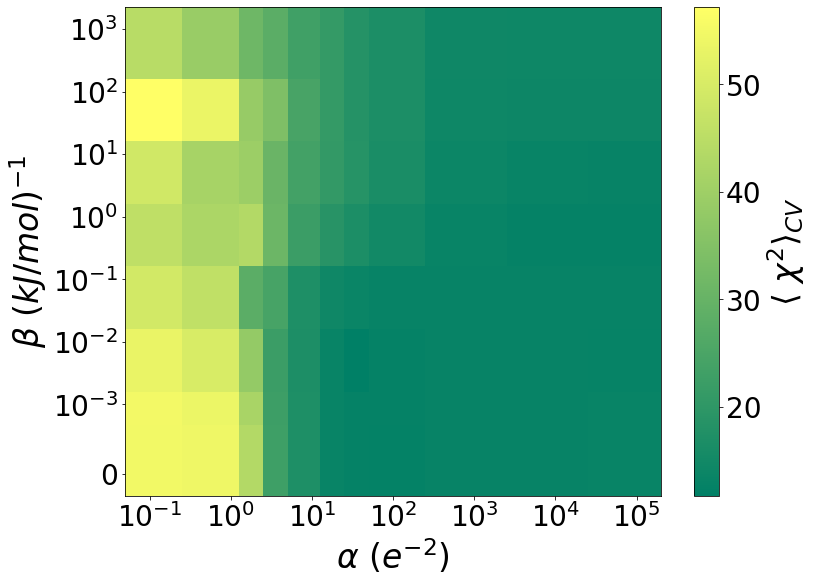

In [152]:
#Cross Validation 2d map

alp=[]
chi=[]
stdchi=[]
bet=[]
for j in range(len(CV3)):
    alp.append(CV3[j][0])
    bet.append(CV3[j][1])
    chi.append(CV3[j][2][0])
    stdchi.append(CV3[j][2][1])
    
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
ax = plt.axes()


# Data for three-dimensional scattered points
zdata = chi
xdata = alp
ydata = bet

ax.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize=33)
ax.set_ylabel(r'$\beta$ $(kJ/mol)^{-1}$', fontsize=33)
ax.set_xscale('log')
ax.set_yscale('symlog', linthreshy=0.001)

ax.tick_params(axis='both', which='major', labelsize=28)
ax.set_xticks([0.1,1,10,100,1000,10000,100000])

#ax.set_zscale('log')
#ax.xaxis._set_scale('log')
pnt3d=ax.scatter(xdata, ydata, c=zdata, marker='s', s=9500, cmap='summer');
#pnt3d=ax.contourf(xdata, ydata, zdata, cmap='hot')
cbar=plt.colorbar(pnt3d, aspect=20)
cbar.ax.tick_params(labelsize=28) 
cbar.set_label(r'$\langle$ $\chi ^2 \rangle _{CV}$', fontsize=33)
plt.savefig('fig4a.png', format='png', dpi=900, bbox_inches='tight')

plt.show()

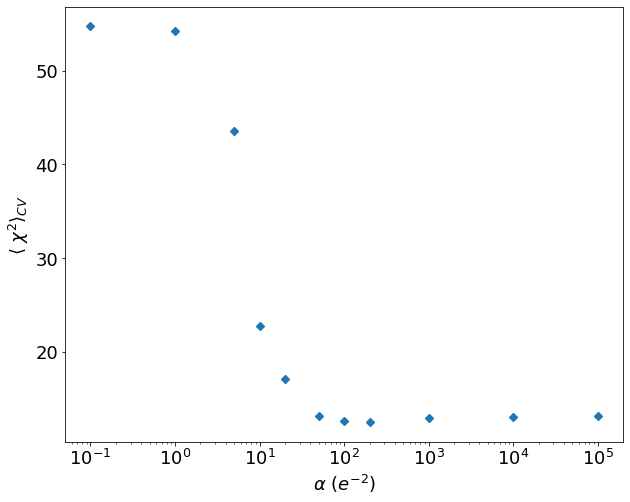

In [151]:
#Projecting chi square along Beta=0 axis

alp=[]
chi=[]
stdchi=[]
bet=[]
for j in range(len(CV3)):
    if CV3[j][1]==0:
        alp.append(CV3[j][0])
        chi.append(CV3[j][2][0])
        stdchi.append(CV3[j][2][1])
        
plt.figure(figsize=(10,8))
ax = plt.axes()

ydata = chi
xdata = alp

ax.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize=18)
ax.set_ylabel(r'$\langle$ $\chi ^2 \rangle _{CV}$', fontsize=18)
ax.set_xscale('log')

ax.tick_params(axis='both', which='major', labelsize=18)

plt.plot(xdata, ydata, 'D')


plt.show()

In [110]:
#For Beta set 0, perform minimization for 14 different alpha values

lista=[]
lis_chis=[]
Kish=[]
Beta=0

for alpha in (100000, 10000, 1000, 500, 200, 100, 50, 20, 10, 5, 2 , 1, 0.5, 0.1):

      
        lambdas=scipy.optimize.minimize(func_and_grad_2met, x0=lambdas.x , method='L-BFGS-B',jac=True)
        lista.append((alpha, lambdas.x))
        lis_chis.append((alpha,chis(lambdas.x)))
        Kish.append(Kish_size(lambdas.x)/Kish_size(np.zeros(6)))

Chi2: [1.0192388104994878, 0.612483289676755, 0.06215167080143206, 0.0013490195053674871, 0.07820858967752756, 0.10049715073983884, 0.6781598285926951, 0.04556977798220885, 0.571674594789926, 3.054516206377037]
Chi2: [2199.8533541336647, 513.8591962967012, 1946.5868932795609, 13.871229005178614, 4.717349858928918, 419.03824573848203, 4592.067803103308, 1232.0999560353819, 4904.098188761988, 1759.216538842226]
Chi2: [1.027768810780515, 0.6112491814041949, 0.06148439341609565, 0.0012930960310388823, 0.07708686636072919, 0.10257481538121344, 0.7002604661445189, 0.04415353145069584, 0.5652981470569529, 3.0558265330700314]
Chi2: [1.0256118140353832, 0.6155360349215537, 0.05957822221955448, 0.0013040212530224398, 0.07720710950161398, 0.10331791387566674, 0.7061597375940761, 0.04299920364781016, 0.5593566182084033, 3.0692124010239588]
Chi2: [1.0176847376736222, 0.6314528541081409, 0.052830765042770775, 0.0013449371735645955, 0.07766163592365495, 0.10606435751458786, 0.7279486351370158, 0.0388

Chi2: [1.019202844800263, 0.612643061290874, 0.062163477581111855, 0.0013522128332564228, 0.0782407878604142, 0.10044419818704589, 0.6779249897827607, 0.04555341724493836, 0.5718902065523681, 3.0545690086666553]
Chi2: [1.019202844800263, 0.612643061290874, 0.062163477581111855, 0.0013522128332564228, 0.0782407878604142, 0.10044419818704589, 0.6779249897827607, 0.04555341724493836, 0.5718902065523681, 3.0545690086666553]
Chi2: [1.019202844800263, 0.612643061290874, 0.062163477581111855, 0.0013522128332564228, 0.0782407878604142, 0.10044419818704589, 0.6779249897827607, 0.04555341724493836, 0.5718902065523681, 3.0545690086666553]
Chi2: [1.019202844800263, 0.612643061290874, 0.062163477581111855, 0.0013522128332564228, 0.0782407878604142, 0.10044419818704589, 0.6779249897827607, 0.04555341724493836, 0.5718902065523681, 3.0545690086666553]
Chi2: [1.019202844800263, 0.612643061290874, 0.062163477581111855, 0.0013522128332564228, 0.0782407878604142, 0.10044419818704589, 0.6779249897827607, 0

Chi2: [0.6965236565677918, 0.6106450552755861, 0.08509714223998943, 0.00102286440365394, 0.08069316366394293, 0.09174125444209633, 0.44745924198947895, 0.0787844501963122, 0.6511947613536248, 2.8487087764459647]
Chi2: [0.6970194013456547, 0.6104176587154652, 0.08516291033838808, 0.0010223532593309301, 0.08067703194357317, 0.09173599398492112, 0.4473027853960287, 0.07884422850368543, 0.6513071204370116, 2.8483909071473095]
Chi2: [0.6967734521324067, 0.6105297396947671, 0.08513096588661696, 0.0010226200747025477, 0.08068601545670458, 0.09173838322607637, 0.4473803217302134, 0.07881477506244582, 0.6512537293332058, 2.8485493178088808]
Chi2: [0.6965287450314138, 0.6106465734623533, 0.08509667218063247, 0.001022872438893162, 0.08069411010144173, 0.09174085835611316, 0.44745814086416247, 0.07878510564874859, 0.6511939106058698, 2.848705173303964]
Chi2: [0.6965236565736725, 0.6106450552725271, 0.08509714224110809, 0.0010228644036529818, 0.0806931636639713, 0.09174125444159595, 0.4474592419877

Chi2: [0.495330793577058, 0.5967314591072173, 0.09856640834920154, 0.0005449234681048249, 0.08052732872419256, 0.09284850598078564, 0.3166687343424559, 0.1168603797459877, 0.6955601431935899, 2.6622497579218605]
Chi2: [0.4972216393509069, 0.5945340362874038, 0.09933930375483754, 0.0005396088177325304, 0.08054937195794251, 0.0925230155068804, 0.3161438364839881, 0.11756141600848294, 0.697961755900783, 2.657512289688345]
Chi2: [0.4967741817598867, 0.5943703472685253, 0.09943683248514572, 0.0005396101298888788, 0.08063358664717402, 0.09237180003542018, 0.31605783202167914, 0.11765082659038259, 0.6987026016928408, 2.656599567727338]
Chi2: [0.4961828558914202, 0.594875970033897, 0.09931347802987263, 0.0005421606250359883, 0.0806916602762172, 0.09232941787324538, 0.3162064238676548, 0.11747080539498263, 0.6986622013964362, 2.657391414128372]
Chi2: [0.49612437138814053, 0.594930886786523, 0.09929864147651679, 0.0005423721222689524, 0.08069428733207022, 0.09233079692536696, 0.31621308131721065

Chi2: [0.4961818369793848, 0.5948760748820973, 0.09931343586913448, 0.00054214892808477, 0.08069250767862003, 0.0923295227177276, 0.316204414037714, 0.1174706151765953, 0.6986608129864275, 2.657394067216761]
Chi2: [0.49618184680219707, 0.5948760687945928, 0.09931343831700569, 0.0005421489277126159, 0.08069250768638711, 0.09232952169753288, 0.3162044110005164, 0.11747061698799266, 0.6986605053232812, 2.657393564276786]
Chi2: [0.49618184680219707, 0.5948760687945928, 0.09931343831700569, 0.0005421489277126159, 0.08069250768638711, 0.09232952169753288, 0.3162044110005164, 0.11747061698799266, 0.6986605053232812, 2.657393564276786]
Chi2: [0.4961818418908036, 0.5948760718383606, 0.09931343709306378, 0.0005421489278981698, 0.08069250768251778, 0.09232952220763024, 0.3162044125191074, 0.11747061608229635, 0.6986608167029645, 2.6573940615559413]
Chi2: [0.49618184680219707, 0.5948760687945928, 0.09931343831700569, 0.0005421489277126159, 0.08069250768638711, 0.09232952169753288, 0.31620441100051

Chi2: [0.24420626244858462, 0.5335873941418395, 0.11907674345790283, 2.023465857000856e-11, 0.07589603943680656, 0.11117190917029958, 0.18071336431469076, 0.2145170477196058, 0.7451194573664527, 2.2675970487102783]
Chi2: [0.24405411991175407, 0.5336191654393234, 0.11900730249268165, 1.0151623843298584e-09, 0.07585923874532105, 0.11127000905962804, 0.18055242404566604, 0.21462142719188618, 0.7448262307364091, 2.2676102549351045]
Chi2: [0.24403373539258766, 0.5336239304329382, 0.11899745377505656, 1.3117758343043652e-09, 0.07585468760577703, 0.11128247550737944, 0.1805321851840468, 0.21463527948440472, 0.7447925622804671, 2.2676106750817806]
Chi2: [0.24403232238581168, 0.5336245811361928, 0.1189980500814426, 1.2944550184568299e-09, 0.0758537750665591, 0.11128231957979184, 0.18053302845544103, 0.2146345640766435, 0.7447871725494688, 2.2676091943327767]
Chi2: [0.24403232238584716, 0.5336245811361782, 0.1189980500814426, 1.2944550184568299e-09, 0.0758537750665591, 0.11128231957978327, 0.180

Chi2: [0.11989271596014273, 0.44647060919661635, 0.1342886653821385, 0.00047745101034129937, 0.06927870731626386, 0.14913090028876066, 0.13888543236790996, 0.3222098140256915, 0.722073916578573, 1.9210667203074654]
Chi2: [0.11989271596014273, 0.44647060919661635, 0.1342886653821385, 0.00047745101034129937, 0.06927870731626386, 0.14913090028876066, 0.13888543236790996, 0.3222098140256915, 0.722073916578573, 1.9210667203074654]
Chi2: [3705.096011195087, 857.2888345925888, 1013.3229852459341, 0.37578994776053715, 68.7148360339415, 76.94156933214211, 64.93827394786688, 244.6775756681138, 209.19542944473554, 469.9103408321522]
Chi2: [2.1743278174658114, 0.4011302703151129, 2.302108105993055, 0.0973297126187902, 0.1957105787756648, 0.10232177895056023, 0.33180835070833337, 2.496200043043678, 1.6547944185503962, 0.029909064474453538]
Chi2: [0.1542012172151745, 0.33897426843528344, 0.20261273614476275, 0.0006366631896442765, 0.06934525108236717, 0.14135773733454782, 0.08781974766465223, 0.4290

Chi2: [0.05274821670618496, 0.3396643641645929, 0.15060261673689185, 0.0009902012416958018, 0.06695784262347922, 0.21020741283352176, 0.12618820149414223, 0.45809776157311505, 0.6299960257155542, 1.5880846267543072]
Chi2: [0.05274821670618496, 0.3396643641645929, 0.15060261673689185, 0.0009902012416958018, 0.06695784262347922, 0.21020741283352176, 0.12618820149414223, 0.45809776157311505, 0.6299960257155542, 1.5880846267543072]
Chi2: [0.05274821752047491, 0.33966436298491076, 0.15060261751964302, 0.0009902012411070623, 0.06695784262151014, 0.21020741243548272, 0.12618820099995973, 0.4580977625192898, 0.6299960275296898, 1.5880846244483235]
Chi2: [0.05274821752129234, 0.33966436298371183, 0.15060261752042586, 0.0009902012411065909, 0.06695784262150496, 0.21020741243509028, 0.1261882009994587, 0.4580977625202538, 0.6299960275315089, 1.588084624446081]
Chi2: [0.05274821752129234, 0.33966436298371183, 0.15060261752042586, 0.0009902012411065909, 0.06695784262150496, 0.21020741243509028, 0.1

Chi2: [0.008614284928044568, 0.2172600462560919, 0.17134101732541338, 0.0008464161851542716, 0.11139015740606596, 0.25582829482731684, 0.09186355502493473, 0.6555114566454916, 0.4737601541367807, 1.282054543657607]
Chi2: [0.008609892914048758, 0.21729381865045216, 0.17134194903562283, 0.0008443118953469531, 0.11133967980011392, 0.25591786329698574, 0.09185596571851774, 0.6555316452764582, 0.47372434103595223, 1.2820295684364047]
Chi2: [0.008614388535526584, 0.2172613058696977, 0.17134021812099742, 0.0008464439918968463, 0.1113908381091752, 0.25582943446602263, 0.09186299565210224, 0.6555108010724914, 0.47376063269399005, 1.2820552159941179]
Chi2: [0.008614284923853646, 0.21726004626784987, 0.17134101731502951, 0.0008464161851529643, 0.11139015740602597, 0.25582829483281533, 0.09186355503017757, 0.655511456631341, 0.47376015411729394, 1.2820545436833741]
Chi2: [0.008614284923846974, 0.21726004626786846, 0.17134101731502951, 0.0008464161851529643, 0.11139015740602597, 0.2558282948328196,

Chi2: [0.023526940801206063, 0.03945535350508156, 0.06901235762681318, 0.014898467899585186, 0.5060631639214972, 0.028903903333982784, 0.0002754099189106711, 0.7796390625170455, 0.05796933022654363, 0.7075874006490985]
Chi2: [0.02343649357487156, 0.03515386715680548, 0.06946581591395504, 0.01510141130685104, 0.5072321786818181, 0.028094720023437582, 0.0009753932956112547, 0.7713741810815792, 0.05267959107979012, 0.7177203481856771]
Chi2: [0.022669960135859556, 0.02905363948524964, 0.06694143461294798, 0.013275127933564574, 0.5089511051527562, 0.024489485605182063, 0.001979085644534361, 0.764755277472812, 0.049238283967919884, 0.71964683115377]
Chi2: [0.019120816992516085, 0.024125848413721007, 0.05827450904641395, 0.007684815383270028, 0.5067466498277887, 0.017308066608370153, 0.0025023974029322335, 0.7610978259329501, 0.05362597498624616, 0.7097431130518247]
Chi2: [0.004043181825195471, 1.0388571856176718, 2.4387822524786227, 1.183252720169621, 0.6431341242866415, 0.005651526073999575

Chi2: [0.012923494339355773, 0.024506030147714755, 0.04758420660499543, 0.002754982042016415, 0.5041764769161892, 0.011671613597010414, 2.0673588134330096e-05, 0.8007498836377338, 0.07479532642005596, 0.6512601218977355]
Chi2: [0.012923494339355773, 0.024506030147714755, 0.04758420660499543, 0.002754982042016415, 0.5041764769161892, 0.011671613597010414, 2.0673588134330096e-05, 0.8007498836377338, 0.07479532642005596, 0.6512601218977355]
Chi2: [0.012923924213859147, 0.024506558861891414, 0.04758419404471314, 0.002754851337572661, 0.5041788333927311, 0.011671521740415214, 2.066734144892267e-05, 0.8007482662789112, 0.0747957010596538, 0.6512673954671158]
Chi2: [0.012923494339368036, 0.024506030147721007, 0.04758420660498236, 0.002754982042016415, 0.5041764769161892, 0.011671613597014113, 2.0673588134518707e-05, 0.8007498836376967, 0.07479532642003138, 0.6512601218977645]
Chi2: [0.012923494339368036, 0.024506030147721007, 0.04758420660498236, 0.002754982042016415, 0.5041764769161892, 0.01

Chi2: [0.02407644641142023, 0.013491064478365174, 0.050871142504294226, 4.2395285572219866e-05, 0.5241127132418343, 0.0016164948730895796, 0.00019346091913278427, 0.7676748545167011, 0.04041555859001227, 0.6045249547924827]
Chi2: [0.02415509417157132, 0.012732996831059084, 0.050184269055325345, 8.500124250525201e-06, 0.5232388122403685, 0.0018231173090927505, 0.00022855265385928389, 0.7755393951682958, 0.040225616150379846, 0.6011344254530337]
Chi2: [0.024007714149075172, 0.011732809415565367, 0.04846120677920935, 5.184094633627189e-09, 0.5208047118331325, 0.0020097371065945203, 0.00024032116479025123, 0.7852999746897543, 0.04098255101081147, 0.5972461708306086]
Chi2: [0.02143714245715564, 0.009369337298115068, 0.04592564893455937, 1.3339183331764968e-06, 0.5139613129282503, 0.0019122650423396103, 5.308304761157296e-05, 0.7922999388297683, 0.040813086325085464, 0.6013713934784177]
Chi2: [0.03558365830240971, 0.014656882597553218, 0.024216423362573736, 0.0014497913799865556, 0.502881515

Chi2: [0.02806308264462285, 0.007400065087457262, 0.03978534786022691, 0.0025501942027235593, 0.502879335735696, 1.4020089931558507e-05, 5.697829862253838e-05, 0.768813200669022, 0.050331157542977206, 0.5749082317543787]
Chi2: [0.029661281172880416, 0.006555742198074027, 0.03992835435614071, 0.002581665874733531, 0.5028014548824177, 2.4634759050157118e-05, 4.010771301665367e-05, 0.7690719594636644, 0.045554904049895914, 0.5758431488311239]
Chi2: [0.03296385447771501, 0.003413290062276167, 0.043608719760065494, 0.002549383793664825, 0.502940923044946, 0.00012936501773800434, 3.3555776998116293e-06, 0.7668380541517307, 0.03146333891444932, 0.5807174929423927]
Chi2: [0.033295930166538805, 0.00302862779423943, 0.044849900437368535, 0.0025227460453211233, 0.5034556921751971, 0.0001693935452736339, 7.325937511145782e-06, 0.7659931686784861, 0.030402794011381563, 0.5799374273570725]
Chi2: [0.03439426204209947, 0.002061981786629182, 0.050360930087841385, 0.002430776729472937, 0.506345088763603

Chi2: [0.02715863139717282, 0.0051349602866028726, 0.041294408371276244, 0.018584922520158885, 0.49684398949633357, 0.004328653502240736, 0.00015264034886829152, 0.7105433033565458, 0.03294559006108452, 0.5856264196751961]
Chi2: [0.027158631412085216, 0.005134960290170903, 0.041294408361251346, 0.018584922520295703, 0.4968439894963758, 0.004328653500805786, 0.0001526403484383051, 0.710543303327034, 0.032945590050770274, 0.5856264197100262]
Chi2: [0.027158059622956872, 0.005134362835446769, 0.0413010854626605, 0.018575923979603462, 0.49684812838278186, 0.004326604944369903, 0.00015189348305261484, 0.7105371067066822, 0.03294647739367598, 0.5856423371018894]
Chi2: [0.027158294112403492, 0.005134126729247859, 0.04130045856167316, 0.01857613285051817, 0.49684866880236067, 0.0043265323231850665, 0.000151899821417726, 0.7105375401318665, 0.03294673306813936, 0.5856489468272285]
Chi2: [0.027158059622956872, 0.005134362835446769, 0.0413010854626605, 0.018575923979603462, 0.49684812838278186, 0

Chi2: [0.027158059621617908, 0.005134362835130488, 0.0413010854635616, 0.01857592397959325, 0.49684812838281006, 0.004326604944498837, 0.00015189348309095808, 0.7105371067093164, 0.03294647739459771, 0.5856423370987806]
Chi2: [0.027158059621629753, 0.0051343628351319184, 0.041301085463557534, 0.01857592397959325, 0.49684812838281006, 0.004326604944497711, 0.00015189348309095808, 0.710537106709293, 0.03294647739458956, 0.5856423370987943]
Chi2: [0.027158059621629753, 0.0051343628351319184, 0.041301085463557534, 0.01857592397959325, 0.49684812838281006, 0.004326604944497711, 0.00015189348309095808, 0.710537106709293, 0.03294647739458956, 0.5856423370987943]
Chi2: [639.24841354046, 396.13895083736674, 515.496103490584, 0.03651804252454076, 1.3004586836486784, 77.7947635405699, 107.75119816999958, 163.32013272138875, 86.22255709465365, 84.68537733594215]
Chi2: [0.07444642411607462, 1.243600207076962, 0.9709445885052959, 0.04632366670039517, 0.47321737408037107, 0.33719074867956206, 0.01795

Chi2: [0.04124372083241627, 1.0622540238775583e-08, 0.03951342681488795, 0.030641398051522505, 0.43929188548326054, 0.01753315759946014, 0.0008084865862066775, 0.702504810909194, 0.04713421777051299, 0.5668750543136397]
Chi2: [0.04206875999188251, 6.481320708070224e-07, 0.038875627029062845, 0.03145402501240782, 0.43795046284433164, 0.017874373054031764, 0.0009059975976352802, 0.6994760069766324, 0.0468744585643037, 0.5695233232170327]
Chi2: [0.042165445499610946, 9.314661327145274e-08, 0.039057564919043296, 0.03167508984933611, 0.43808626836551284, 0.018047049684089024, 0.0008642241628258334, 0.6996006336000535, 0.04654998780121784, 0.5688154521063395]
Chi2: [0.0421097624860058, 3.449857841126785e-07, 0.038954072379298356, 0.03154859413006998, 0.4380098460682698, 0.017948399774644408, 0.0008880825894616654, 0.699530757538473, 0.04673484040577311, 0.5692212089341457]
Chi2: [0.04218741656565743, 2.2157830651587512e-06, 0.03887148416211881, 0.03156662966474377, 0.4385868022493071, 0.0178

Chi2: [0.04356411947685462, 8.522016537587283e-07, 0.03905791938930512, 0.039133842510753775, 0.4366559358883223, 0.02173443900992356, 0.0005993438985284621, 0.6871952114376313, 0.04368480336000943, 0.5707066303351407]
Chi2: [0.04356258346780042, 8.521988299028798e-07, 0.03905726411384647, 0.0391338425190273, 0.43665593588749085, 0.02173443920739534, 0.0005993568404928577, 0.6871952132205329, 0.04368480408967283, 0.5707068888576011]
Chi2: [0.04356258346780042, 8.521988299397554e-07, 0.03905726411383464, 0.0391338425190273, 0.43665593588749085, 0.021734439207394082, 0.0005993568404931962, 0.6871952132204986, 0.043684804089658746, 0.5707068888576148]
Chi2: [0.04356258404778761, 8.522002418302192e-07, 0.03905791968897079, 0.03913384251489054, 0.4366559358879132, 0.02173443910865945, 0.0005993568666645679, 0.6871952123290536, 0.043684803724836435, 0.5707068899138626]
Chi2: [0.04356258346781543, 8.521988299581931e-07, 0.03905726411383464, 0.0391338425190273, 0.43665593588749085, 0.021734439

Chi2: [0.04332860237602541, 1.4225225426531727e-06, 0.03897280504091853, 0.04746887964935547, 0.4340122246928435, 0.025579968151795026, 0.00038586853547571595, 0.6760716139082698, 0.04178524954181959, 0.57368464905276]
Chi2: [0.04340547691831466, 1.3407815445568147e-08, 0.03915034807316085, 0.04687693007693099, 0.4337853555648769, 0.02537549961581473, 0.0004058015817343481, 0.6775275944255995, 0.04116885899578244, 0.5736231821973996]
Chi2: [0.04333427975047909, 1.2350708869923883e-06, 0.03898343127422688, 0.04743109835822229, 0.4339956570509393, 0.02556725164874325, 0.0003870270151655519, 0.6761592314360154, 0.04174675881652412, 0.5736880968405788]
Chi2: [0.04332965995508612, 1.417820086333863e-06, 0.03897290392856186, 0.04746735623750578, 0.434010458735695, 0.025579809362095512, 0.0003858375108515437, 0.6760717488646679, 0.04178556859773691, 0.5736954499127758]
Chi2: [0.043328602381151535, 1.4225225588040812e-06, 0.038972805038261, 0.04746887964931631, 0.4340122246928698, 0.0255799681

In [111]:
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
x8=[]
x9=[]
x10=[]
summ=[]
for i in range(len(lis_chis)):
    x1.append(lis_chis[i][1][0])
    x2.append(lis_chis[i][1][1])
    x3.append(lis_chis[i][1][2])
    x4.append(lis_chis[i][1][3])
    x5.append(lis_chis[i][1][4])
    x6.append(lis_chis[i][1][5])
    x7.append(lis_chis[i][1][6])
    x8.append(lis_chis[i][1][7])
    x9.append(lis_chis[i][1][8])
    x10.append(lis_chis[i][1][9])    
    summ.append(np.average(lis_chis[i][1]))
    
Al=[]
q1=[]
q2=[]
q3=[]
q4=[]
q5=[]
q0=[]
tor=[]
for i in range(len(lista)):
    Al.append(lista[i][0])
    q1.append(lista[i][1][0])
    q2.append(lista[i][1][1])
    q3.append(lista[i][1][2])
    q4.append(lista[i][1][3])
    q5.append(lista[i][1][4])
    tor.append(lista[i][1][5])

q0=-np.array(q1)-np.array(q2)-np.array(q3)-np.array(q4)-3*np.array(q5) 

<Figure size 1382.4x777.6 with 0 Axes>

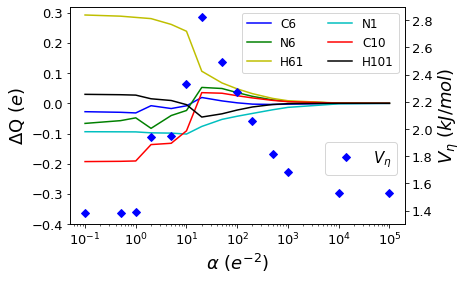

In [140]:
#plotting parameters values as a function of alpha

import matplotlib.pyplot as plt
import numpy as np
import pylab

plt.figure(figsize=(19.20,10.80))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(Al, q0, color='b', label='C6')
ax1.plot(Al, q1, color='g', label='N6')
ax1.plot(Al, q2, color='y', label='H61')
ax1.plot(Al, q3, color='c', label='N1')
ax1.plot(Al, q4, color='r', label='C10')
ax1.plot(Al, q5, color='k', label='H101')
ax1.set_ylim([-0.4,0.32])
ax2.set_ylim([1.3,2.9])


ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)

ax2.plot(Al, tor, 'D', color='b', label=r'$V_{\eta}$')
ax1.set_xscale('log')

ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =18)
ax1.set_ylabel(r'$\Delta$Q ($e$)', fontsize  =18)
ax2.set_ylabel(r'$V_{\eta}$ ($kJ/mol$)', fontsize  =18)

ax1.legend(loc='upper right', fontsize=12, ncol=2)
ax2.legend(bbox_to_anchor=(1.0, 0.41), fontsize=15)
plt.savefig('fig4b.png', format='png', dpi=500, bbox_inches='tight')
plt.show()

<Figure size 1080x720 with 0 Axes>

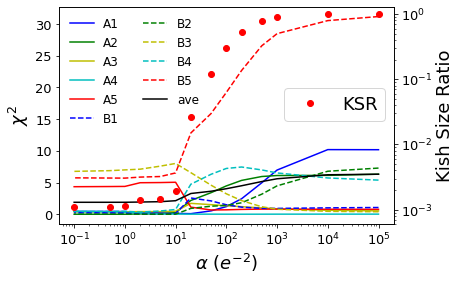

In [135]:
#plotting KSR and chi square values as a function of alpha


plt.figure(figsize=(15, 10))



fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(Al, x1, color='b', label='A1')
ax1.plot(Al, x2, color='g', label='A2')
ax1.plot(Al, x3, color='y', label='A3')
ax1.plot(Al, x4, color='c', label='A4')
ax1.plot(Al, x5, color='r', label='A5')
ax1.plot(Al, x6, '--', color='b', label='B1')
ax1.plot(Al, x7, '--', color='g', label='B2')
ax1.plot(Al, x8, '--', color='y', label='B3')
ax1.plot(Al, x9, '--', color='c', label='B4')
ax1.plot(Al, x10, '--', color='r', label='B5')
ax1.plot(Al, summ, color='k', label='ave')


ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.set_ylim([0.0006,1.3])

ax2.plot(Al, Kish, 'o', color='r', label=r'KSR')
ax1.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel(r'$\alpha$ ($e^{-2}$)', fontsize  =18)
ax1.set_ylabel(r'$\chi ^2$', fontsize  =18)
ax2.set_ylabel('Kish Size Ratio', fontsize  =18)

ax1.legend(loc='upper left', fontsize=12, frameon=False, ncol=2)
ax2.legend(loc='center right',bbox_to_anchor=(1.0, 0.55), fontsize=18)
plt.savefig('fig4c.png', format='png', dpi=500, bbox_inches='tight')
plt.show()